# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [96]:
from bs4 import BeautifulSoup

In [82]:
from collections import Counter

In [2]:
from PIL import Image

In [3]:
import os
import glob

## Константы

In [93]:
seed = 42
train_dataset_path = "./Data/train"
test_dataset_path = "./Data/test"

# Разведочный анализ данных

## Визуализация распределения классов в обучающей выборке

In [116]:
# Записываем в список все xml файлы для определения распределения классов из обучающей выборки
train_xml_files = glob.glob(train_dataset_path + '/*.xml')

In [117]:
# Кол-во различных классов (символов)
counter = Counter()

for i in range(len(train_xml_files)):
    with open(train_xml_files[i], 'r') as f:
        data = f.read()

    counter.update([x.text for x in BeautifulSoup(data, "xml").find_all('name')])

In [136]:
# Топ 5 самых встречающихся классов в обучающей выборке
dict(counter.most_common(5))

{'7': 260, '3': 257, '5': 242, '2': 233, 'J': 233}

In [155]:
# Итоговое распределение всех классов
dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

{'7': 260,
 '3': 257,
 '5': 242,
 '2': 233,
 'J': 233,
 '0': 220,
 '4': 208,
 '9': 191,
 'D': 190,
 '8': 175,
 '6': 173,
 'B': 165,
 'A': 157,
 '1': 156,
 'N': 102,
 'X': 83,
 'L': 70,
 'Z': 69,
 'V': 66,
 'S': 64,
 'T': 58,
 'R': 47,
 'K': 46,
 'H': 46,
 'G': 45,
 'E': 37,
 'U': 35}

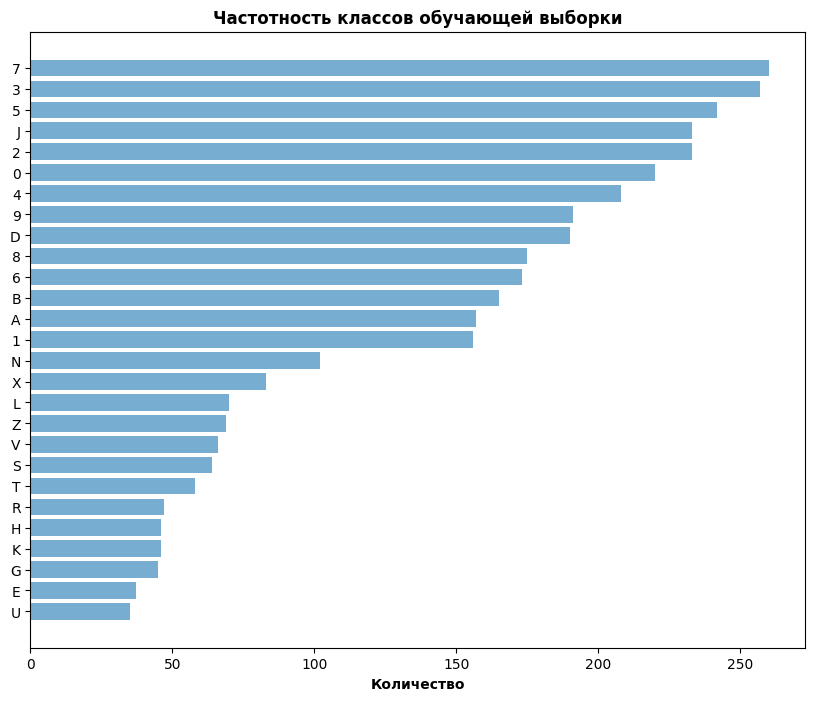

In [208]:
# График распределения классов обучающей выборки
ordered = dict(sorted(counter.items(), key=lambda item: item[1]))
keys = ordered.keys()
y_pos = np.arange(len(keys))
counts = [ordered[k] for k in keys]

plt.figure(figsize=(10, 8))
plt.barh(y_pos, counts, align='center', alpha=0.6)
plt.yticks(y_pos, keys)
plt.xlabel('Количество', weight='bold')
plt.title('Частотность классов обучающей выборки', weight='bold', fontsize=12)

plt.show()

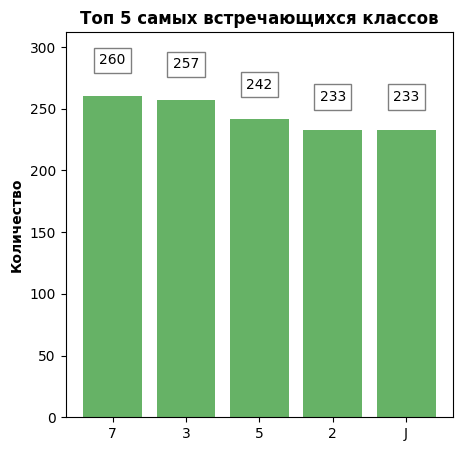

In [207]:
# Топ 5 самых популярных классов
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.1 * y[i], y[i], ha = 'center',
                 bbox = dict(facecolor = 'white', alpha =.5, lw=1))


ordered = dict(sorted(counter.most_common(5), key=lambda item: item[1], reverse=True))
keys = ordered.keys()
y_pos = np.arange(len(keys))
counts = [ordered[k] for k in keys]

fig, ax = plt.subplots(figsize=(5, 5))

addlabels(y_pos, counts)
plt.bar(y_pos, counts, align='center', alpha=0.6, color = 'g')
plt.xticks(y_pos, keys)
ax.set_ylim([0,max(counts) + 0.2 * max(counts)])
plt.ylabel('Количество', weight='bold')
plt.title('Топ 5 самых встречающихся классов', weight='bold', fontsize=12)

plt.show()

## Визуализация примеров данных

# Обучение модели

# Тестирование модели